# Exploratory Data Analysis of Telco Churn dataset (by: Aadi Deshpande)

In [1]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to display all the graphs in the notebook
%matplotlib inline

In [2]:
tdata = pd.read_csv('telco-cust-churn.csv')

In [3]:
tdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
tdata.shape #no. of rows and columns

(7043, 21)

In [5]:
#remove customer id as it is not useful 
tdata.drop(['customerID'], axis = 1, inplace = True)
tdata.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
tdata['Churn'].replace(('Yes','No'), (1,0), inplace = True)
#tdata['Churn'] = tdata['Churn'].replace({"Yes" : 1}, {"No" : 0})
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(3), object(16)
memory usage: 1.1+ MB


In [7]:
tdata['TotalCharges'] = pd.to_numeric(tdata['TotalCharges'], errors='coerce')
#convert object to numeric

In [8]:
tdata.isnull().sum()
#we have 11 missing values

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#we remove the row of data with the missing values
tdata.dropna(axis = 0, inplace=True)

In [10]:
tdata.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
tdata.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


# Let us check the distribution of the above data

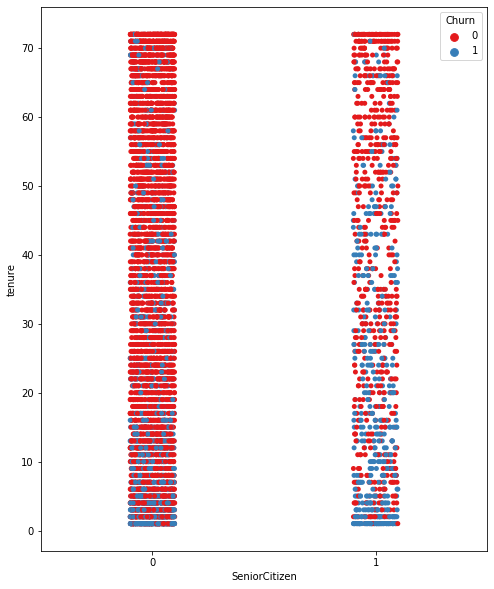

In [68]:
plt.figure(figsize=(8,10))
sns.stripplot(x="SeniorCitizen", y="tenure", data=tdata,hue='Churn',palette='Set1')

 Senior Citizens with low tenure have churned in more numbers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6db71512e8>,
      dtype=object)

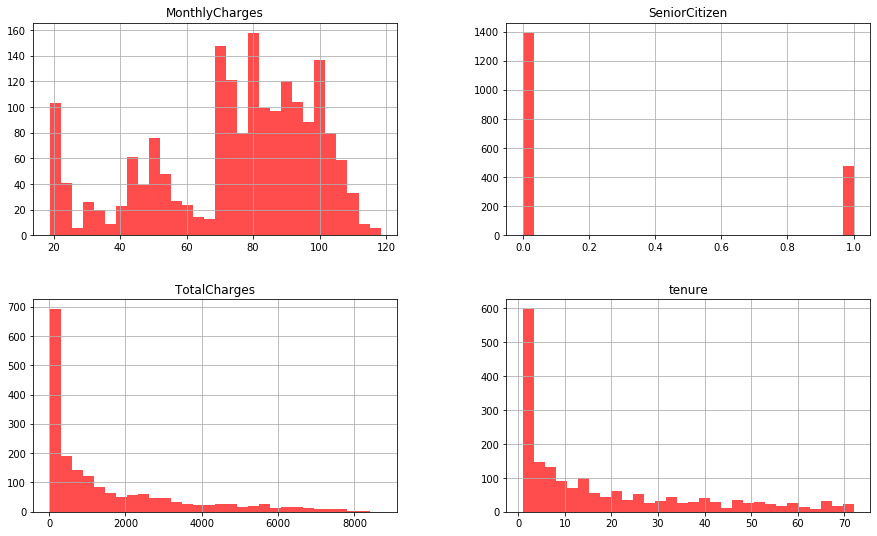

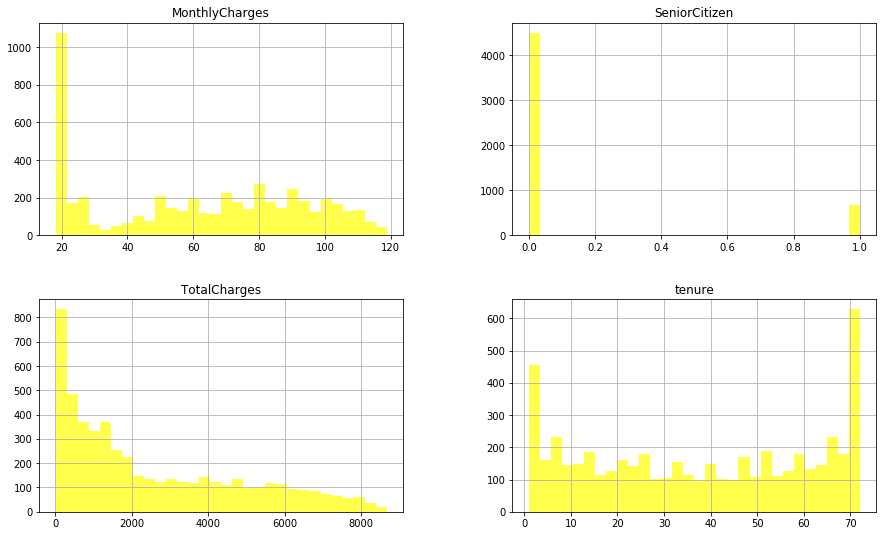

In [79]:
nums = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']
tdata[tdata.Churn==1][nums].hist(bins=30, figsize=(15, 9) ,color = "red", alpha=0.7)
tdata[tdata.Churn==0][nums].hist(bins=30, figsize=(15, 9) ,color = "yellow", alpha=0.7)

# Convert Columns with Yes and No to 1 and 0


In [32]:
tdata['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [33]:
columns1 = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
columns2=['StreamingTV',
           'StreamingMovies','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity']

for item in columns2:
    #tdata[item].replace(to_replace='yes', value=1, inplace=True)
    #tdata[item].replace(to_replace='no',  value=0, inplace=True)
    tdata[item].replace(('Yes','No','No internet service'), (1,0,0), inplace = True)
for item in columns1:
    #tdata[item].replace(to_replace='yes', value=1, inplace=True)
    #tdata[item].replace(to_replace='no',  value=0, inplace=True)
    tdata[item].replace(('Yes','No'), (1,0), inplace = True)

tdata.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [34]:
tdata.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [35]:
tdata['StreamingTV'] = pd.to_numeric(tdata['StreamingTV'], errors='coerce')
tdata['StreamingMovies'] = pd.to_numeric(tdata['StreamingMovies'], errors='coerce')
tdata['OnlineBackup'] = pd.to_numeric(tdata['OnlineBackup'], errors='coerce')
tdata['OnlineSecurity'] = pd.to_numeric(tdata['OnlineSecurity'], errors='coerce')
tdata['DeviceProtection'] = pd.to_numeric(tdata['DeviceProtection'], errors='coerce')
tdata['TechSupport'] = pd.to_numeric(tdata['TechSupport'], errors='coerce')

In [37]:
tdata['StreamingTV'].value_counts()

0    4329
1    2703
Name: StreamingTV, dtype: int64

In [38]:
tdata.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

# Exploring the data by using Count Plots

/home/aadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 2160x1440 with 0 Axes>

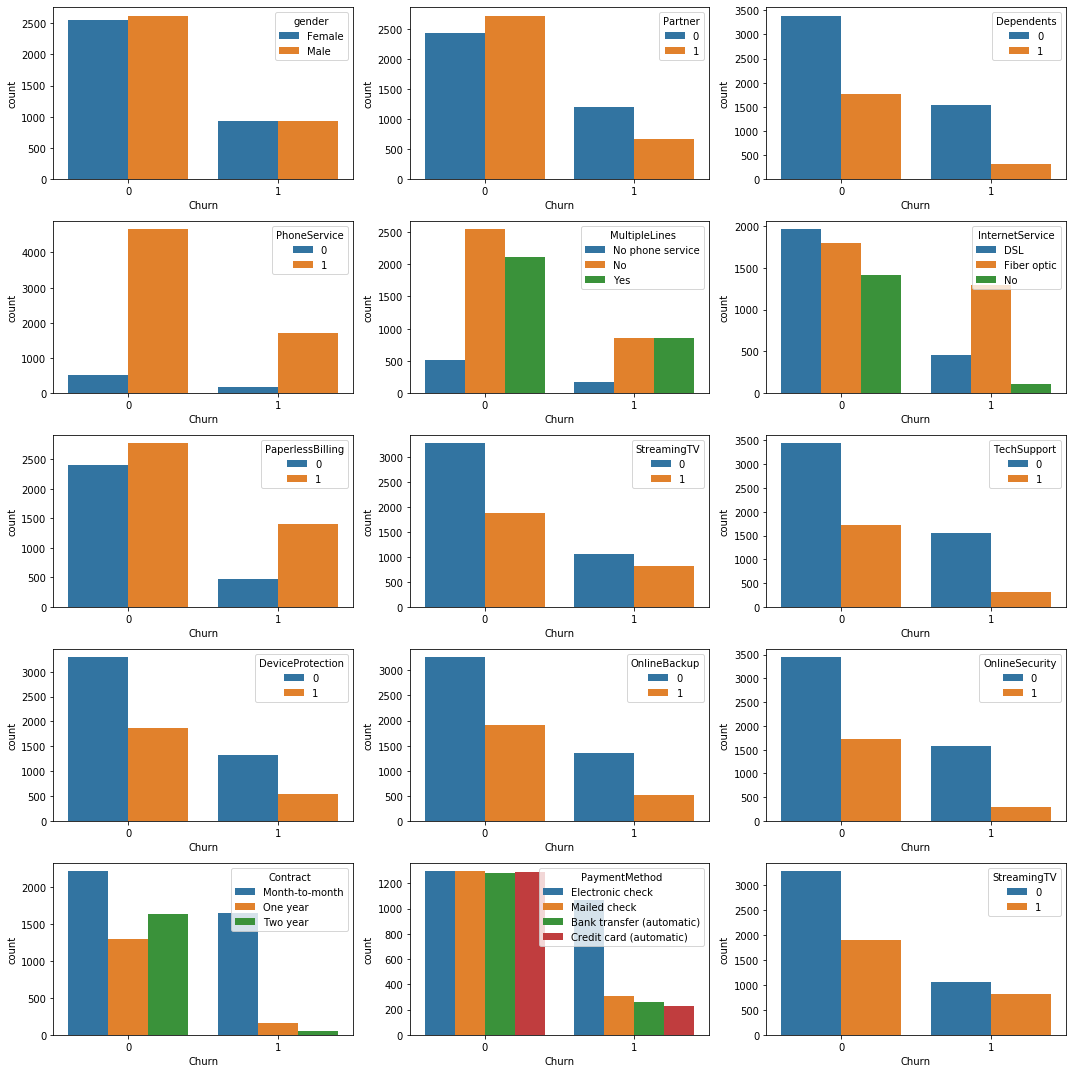

In [80]:
plt.figure(figsize=(30,20))
plt.rcParams['figure.figsize'] = [15, 15]
fig, ax =plt.subplots(5,3)

sns.countplot(x='Churn',hue='gender', data = tdata, ax=ax[0,0])
sns.countplot(x='Churn',hue='Partner', data = tdata, ax=ax[0,1])
sns.countplot(x='Churn',hue='Dependents', data = tdata, ax=ax[0,2])
sns.countplot(x='Churn',hue='PhoneService', data = tdata, ax=ax[1,0])
sns.countplot(x='Churn',hue='MultipleLines', data = tdata, ax=ax[1,1])
sns.countplot(x='Churn',hue='InternetService', data = tdata, ax=ax[1,2])
sns.countplot(x='Churn',hue='PaperlessBilling', data = tdata, ax=ax[2,0])
sns.countplot(x='Churn',hue='StreamingTV', data = tdata, ax=ax[2,1])
sns.countplot(x='Churn',hue='TechSupport', data = tdata, ax=ax[2,2])
sns.countplot(x='Churn',hue='DeviceProtection', data = tdata, ax=ax[3,0])
sns.countplot(x='Churn',hue='OnlineBackup', data = tdata, ax=ax[3,1])
sns.countplot(x='Churn',hue='OnlineSecurity', data = tdata, ax=ax[3,2])
sns.countplot(x='Churn',hue='Contract', data = tdata, ax=ax[4,0])
sns.countplot(x='Churn',hue='PaymentMethod', data = tdata, ax=ax[4,1])
sns.countplot(x='Churn',hue='StreamingTV', data = tdata, ax=ax[4,2])

plt.tight_layout()
fig.show()

###  Some important relations observed:
 Customers who churn have :
1. Contract month-to-month
2. No OnlineBackup
3. No DeviceProtection
4. fiber-optic Cable
5. Dependents
6. PhoneService
7. No OnlineSecurity
###### we will further analyse these features below

% of non churners are  73.42
% of churners are  26.58


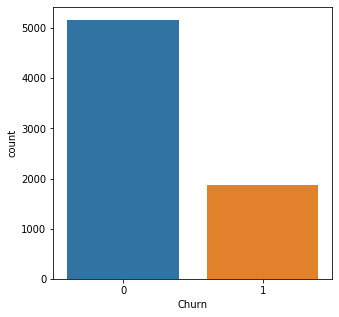

In [40]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.countplot(x='Churn', data=tdata)
x,y = tdata['Churn'].value_counts()
print('% of non churners are ' , round(x/7032 * 100,2))
print('% of churners are ' , round(y/7032 * 100,2))

# Visualization using other plots

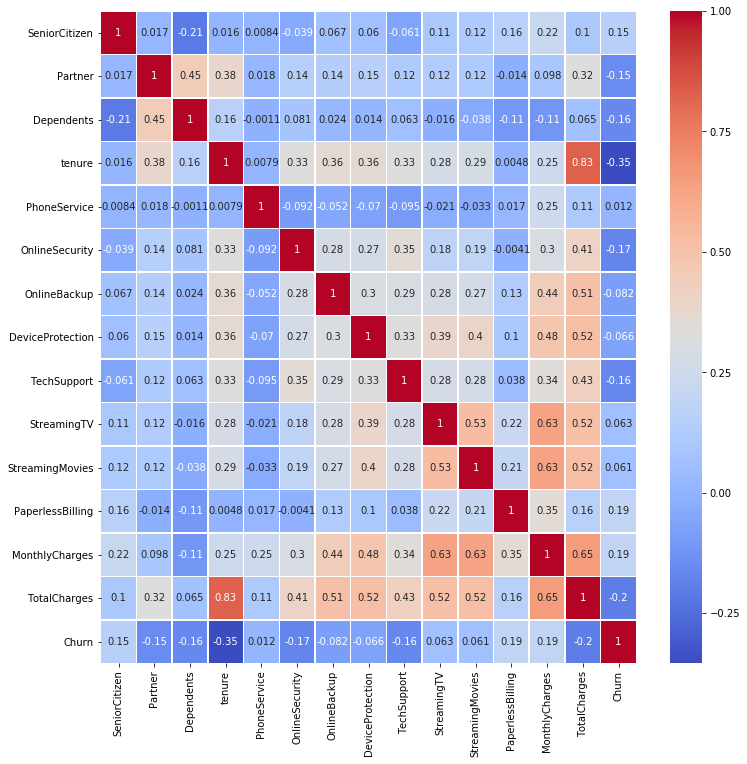

In [41]:
plt.rcParams['figure.figsize'] = [12, 12]
sns.heatmap(tdata.corr(),annot=True, cmap='coolwarm', linewidth = .5)

#### A strong correlation between tenure and total charges is observed.
Weak correlation between 
- Monthlycharges and totalcharges
- Streaming and Monthlycharges
- dependents and partner 
is seen

Low tenure and high Monthly Charges tend to churn.

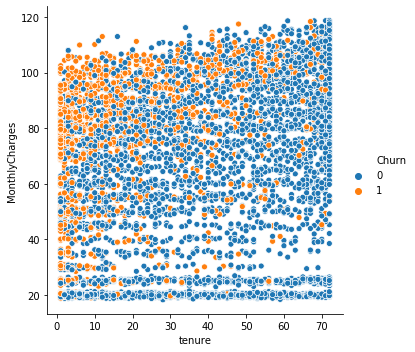

In [149]:
sns.relplot(x="tenure", y="MonthlyCharges", hue="Churn", data=tdata);

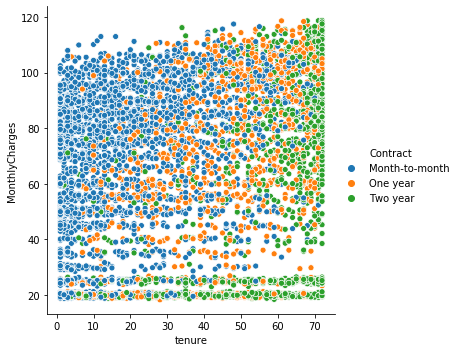

In [43]:
sns.relplot(x="tenure", y="MonthlyCharges", hue="Contract", data=tdata);

1. Month to month contract is more popular for low tenure, even at high monthly charges
2. If monthly charges are low, customers will tend to opt for two year contracts

#### Contract(month to month) is an more important feature as compared to other features

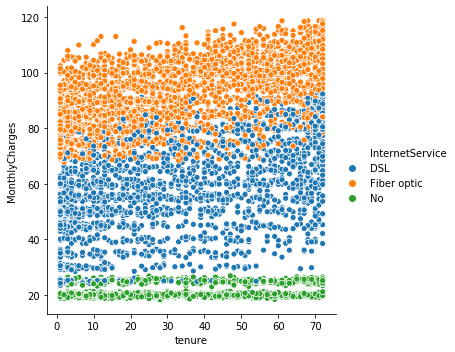

In [81]:
sns.relplot(x="tenure", y="MonthlyCharges", hue="InternetService", data=tdata);

A clear separation between the internet service features is seen. 
##### FIber optics is a feature that will help us predicting the churn

<Figure size 144x144 with 0 Axes>

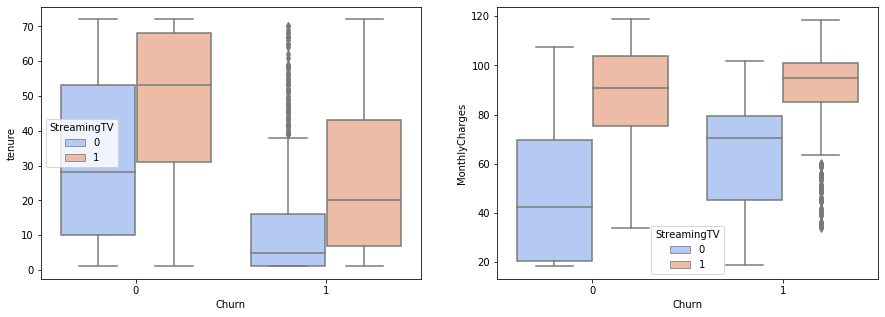

In [110]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.figure(figsize=(2,2))
fig, ax =plt.subplots(1,2)
sns.boxplot(x="Churn", y="tenure", data=tdata,palette='coolwarm',hue='StreamingTV', ax=ax[0])
sns.boxplot(x="Churn", y="MonthlyCharges", data=tdata,palette='coolwarm', hue='StreamingTV', ax=ax[1])

#### There are too many outliers when churn = 1.  This is not a good feature.

<Figure size 504x504 with 0 Axes>

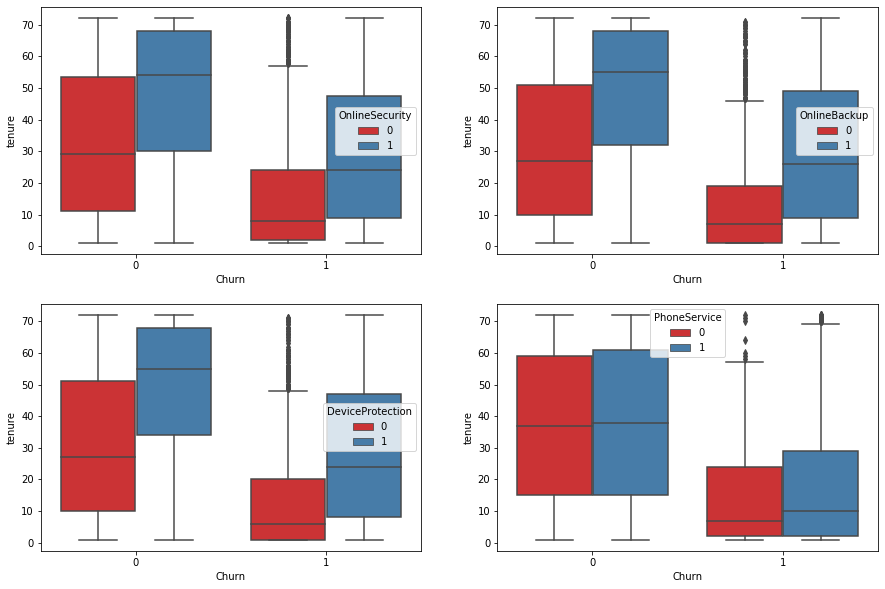

In [122]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.figure(figsize=(7,7))
fig, ax =plt.subplots(2,2)
sns.boxplot(x="Churn", y="tenure", data=tdata,palette='Set1',hue='OnlineSecurity', ax=ax[0,0])
sns.boxplot(x="Churn", y="tenure", data=tdata,palette='Set1', hue='OnlineBackup', ax=ax[0,1])
sns.boxplot(x="Churn", y="tenure", data=tdata,palette='Set1',hue='DeviceProtection', ax=ax[1,0])
sns.boxplot(x="Churn", y="tenure", data=tdata,palette='Set1', hue='PhoneService', ax=ax[1,1])

#### From the 4 graphs above, onlinebackup is more favorable. PhoneService is not a good feature.

## Conclusion

The important features in the dataset are
1. tenure
2. TotalCharges
3. MonthlyCharges
4. Contract
5. InternetService